# noneliner composition

RMSECV: 0.06465148103324131


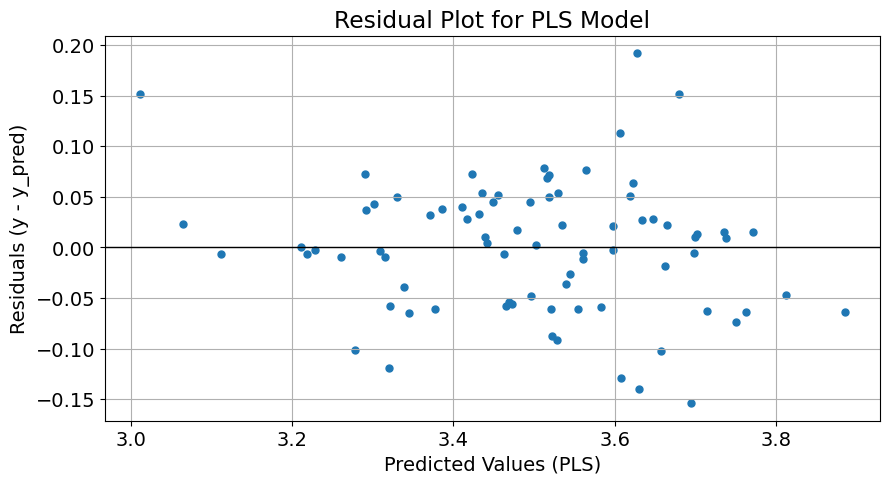

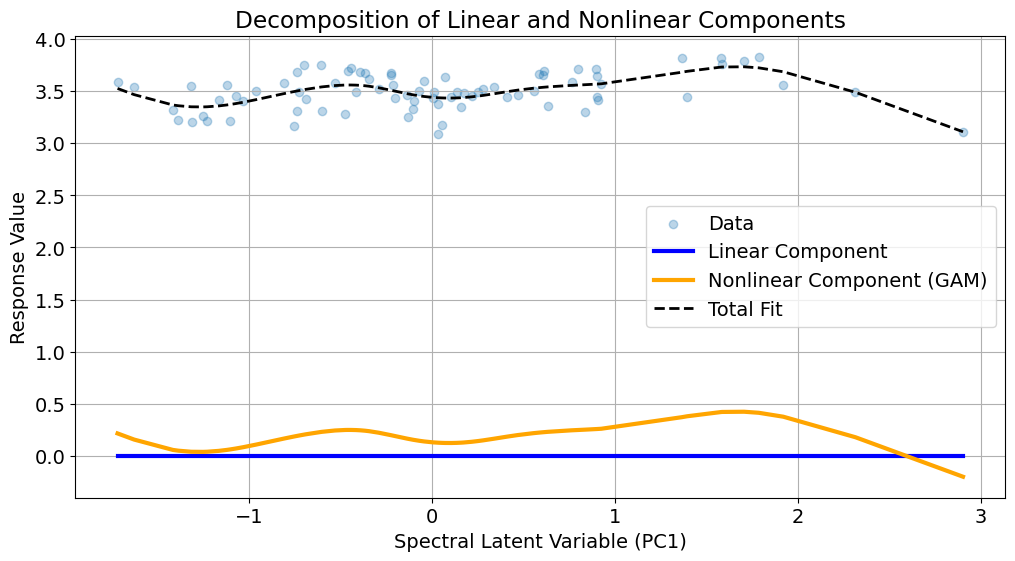

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pygam import LinearGAM, s, l
plt.rcParams.update({'font.size': 14})

data_path = 'D:/A/CSU/NIRdatasets/corn_xlsl/m5_corn.xlsx'
df = pd.read_excel(data_path)
spectra = df.iloc[:, :700].values
y = df.iloc[:, 701].values

n_components = 10
pls = PLSRegression(n_components=n_components)

kf = KFold(n_splits=10, shuffle=True, random_state=0)
y_pred = np.zeros_like(y)

for train_idx, test_idx in kf.split(spectra):
    X_train, X_test = spectra[train_idx], spectra[test_idx]
    y_train = y[train_idx]

    pls.fit(X_train, y_train)
    y_pred[test_idx] = pls.predict(X_test).ravel()

residuals = y - y_pred
rmsecv = np.sqrt(mean_squared_error(y, y_pred))
print("RMSECV:", rmsecv)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals, s=25)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Predicted Values (PLS)')
plt.ylabel('Residuals (y - y_pred)')
plt.title('Residual Plot for PLS Model')
plt.grid(True)
plt.show()

#GAM             
pca = PCA(n_components=1)
pc1 = pca.fit_transform(spectra).flatten()

gam = LinearGAM(l(0) + s(0)).fit(pc1, y)

linear_component = gam.partial_dependence(term=0, X=pc1)
nonlinear_component = gam.partial_dependence(term=1, X=pc1)
y_pred = gam.predict(pc1)


plt.figure(figsize=(12, 6))
plt.scatter(pc1, y, label="Data", alpha=0.3)

order = np.argsort(pc1)
x_sorted = pc1[order]

plt.plot(x_sorted, linear_component[order], 
         'b-', linewidth=3, label="Linear Component")

plt.plot(x_sorted, nonlinear_component[order], 
         'orange', linewidth=3, label="Nonlinear Component (GAM)")

plt.plot(x_sorted, y_pred[order], 
         'k--', linewidth=2, label="Total Fit")

plt.xlabel("Spectral Latent Variable (PC1)")
plt.ylabel("Response Value")
plt.title("Decomposition of Linear and Nonlinear Components")
plt.legend()
plt.grid(True)
plt.show()

# liner composition

RMSECV: 0.021693412270095004


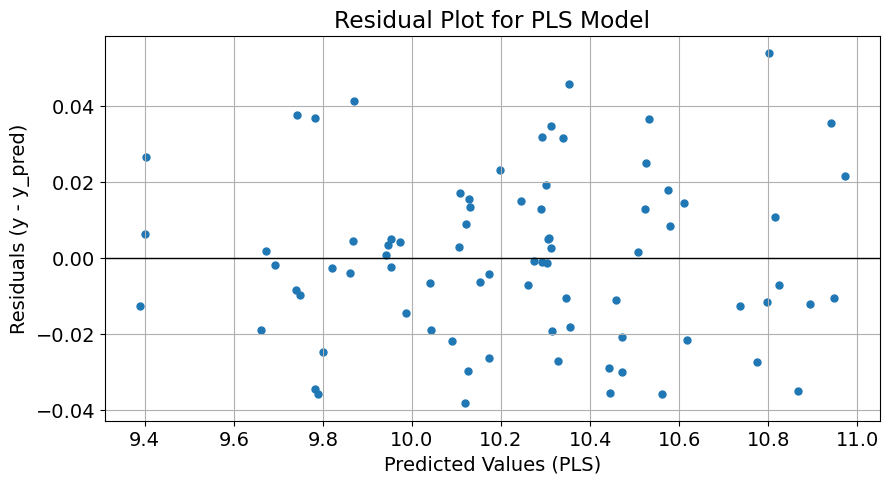

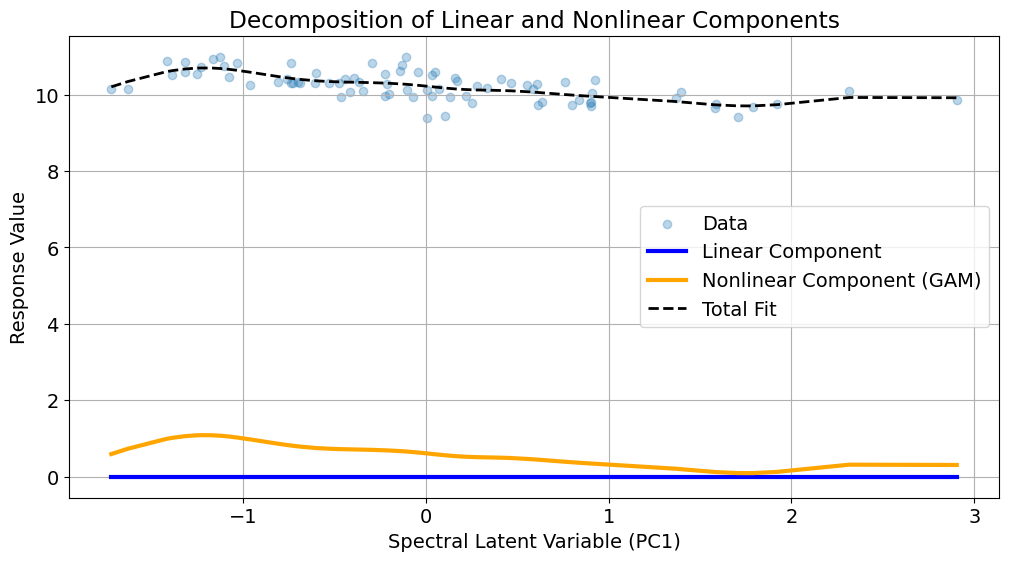

In [2]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pygam import LinearGAM, s, l
plt.rcParams.update({'font.size': 14})

data_path = 'D:/A/CSU/NIRdatasets/corn_xlsl/m5_corn.xlsx'
df = pd.read_excel(data_path)
spectra = df.iloc[:, :700].values
y = df.iloc[:, 700].values

n_components = 10
pls = PLSRegression(n_components=n_components)

kf = KFold(n_splits=10, shuffle=True, random_state=0)
y_pred = np.zeros_like(y)

for train_idx, test_idx in kf.split(spectra):
    X_train, X_test = spectra[train_idx], spectra[test_idx]
    y_train = y[train_idx]

    pls.fit(X_train, y_train)
    y_pred[test_idx] = pls.predict(X_test).ravel()

residuals = y - y_pred
rmsecv = np.sqrt(mean_squared_error(y, y_pred))
print("RMSECV:", rmsecv)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals, s=25)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Predicted Values (PLS)')
plt.ylabel('Residuals (y - y_pred)')
plt.title('Residual Plot for PLS Model')
plt.grid(True)
plt.show()

#GAM             
pca = PCA(n_components=1)
pc1 = pca.fit_transform(spectra).flatten()

gam = LinearGAM(l(0) + s(0)).fit(pc1, y)

linear_component = gam.partial_dependence(term=0, X=pc1)
nonlinear_component = gam.partial_dependence(term=1, X=pc1)
y_pred = gam.predict(pc1)


plt.figure(figsize=(12, 6))
plt.scatter(pc1, y, label="Data", alpha=0.3)

order = np.argsort(pc1)
x_sorted = pc1[order]

plt.plot(x_sorted, linear_component[order], 
         'b-', linewidth=3, label="Linear Component")

plt.plot(x_sorted, nonlinear_component[order], 
         'orange', linewidth=3, label="Nonlinear Component (GAM)")

plt.plot(x_sorted, y_pred[order], 
         'k--', linewidth=2, label="Total Fit")

plt.xlabel("Spectral Latent Variable (PC1)")
plt.ylabel("Response Value")
plt.title("Decomposition of Linear and Nonlinear Components")
plt.legend()
plt.grid(True)
plt.show()